## Exercise 4
3)

Loading dataset and remove rows with null values:

In [2]:
import pandas as pd
from IPython.core.display import display

titanic = pd.read_csv('titanic.csv')
display(titanic.head(8))
titanic = titanic[titanic['Age'].notnull()]
titanic['Sex'] = pd.Categorical(titanic['Sex'].factorize()[0])
display(titanic.head(8))

,Survived,Sex,Age,Class
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3
5,0,male,NaN,3
6,0,male,54.0,1
7,0,male,2.0,3


,Survived,Sex,Age,Class
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3
6,0,0,54.0,1
7,0,0,2.0,3
8,1,1,27.0,3


Making a decision tree and displaying it with Graphviz.

Only the top 4 layers of the tree shown since the image becomes too big otherwise.

Sex = 0 for male, 1 for female

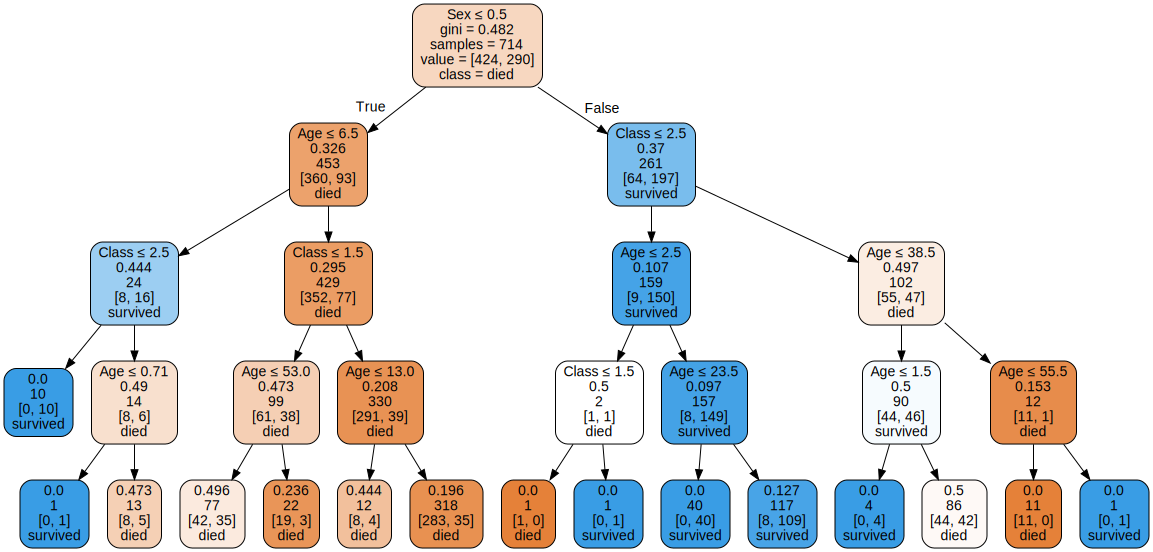

In [10]:
from sklearn import tree
from graphviz import Source
import numpy as np
from IPython.display import SVG

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

survived = pd.Series(np.where(y == 0, 'died', 'survived'))

clf = tree.DecisionTreeClassifier(max_depth=4).fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=survived,
                                filled=True, rounded=True,
                                label='root',
                                special_characters=True)
graph = Source(dot_data)
SVG(graph.pipe(format='svg'))

Classification scores and reports for different depths:


In [19]:
from sklearn.metrics import classification_report

for i in range(1, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i).fit(X, y)
    print("Max depth = " + str(i) + ":", clf.score(X, y))
    print(classification_report(y, clf.predict(X), target_names=['died', 'survived']), '\n')

Max depth = 1: 0.7801120448179272
              precision    recall  f1-score   support

        died       0.79      0.85      0.82       424
    survived       0.75      0.68      0.72       290

    accuracy                           0.78       714
   macro avg       0.77      0.76      0.77       714
weighted avg       0.78      0.78      0.78       714
 

Max depth = 2: 0.8025210084033614
              precision    recall  f1-score   support

        died       0.77      0.96      0.85       424
    survived       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714
 

Max depth = 3: 0.8081232492997199
              precision    recall  f1-score   support

        died       0.81      0.88      0.84       424
    survived       0.80      0.71      0.75       290

    accuracy                           0.81       714
   macro avg       0.8